<a href="https://colab.research.google.com/github/EmmaMontalban/Reduccion_dimensionalidad/blob/main/pca_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ALGORITMO DE COMPONENTES PRINCIPALES (PCA)
### REDUCCIÓN DE LA DIMENSIÓN

La técnica de Análisis de Componentes Principales sirve para detectar la combinación de qué variables y en qué modo nos da una nueva variable o un nuevo conjunto de datos que expliquen el máximo posible de la varianza de la información, prescindiendo del mínimo posible, evidentemente sin perder demasiada información.

# Nueva sección

### Ejemplo: Clasificación de Vinos

Este ejemplo trata de resolver un problema de clasificaciones (clasificación de vinos) con demasiadas variables.
Antes de aplicar el algoritmo de clasificación, mediante PCA se reducirá el número de dimensiones del dataset, para que nos queden dos varibles independientes.

* dataset wine.csv (Repositorio de UCI: https://archive.ics.uci.edu/datasets)

In [ ]:

# Importar las librerías necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
# Cargar dataset
df = pd.read_csv('../Wine.csv')
df.shape

FileNotFoundError: [Errno 2] No such file or directory: '../Wine.csv'

In [ ]:
df.head(5)

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


In [ ]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline',
       'Customer_Segment'],
      dtype='object')

* Decidir cual es la matriz de características de X y el vector de la columna que queremos predecir (y)

    - Matriz de Características (Variables Independientes):  13 primeras columnas (componentes químicos del vino)
    - Vector de la variable a predecir (Variable dependiente): última colum 'Customer_Segment'.
    Para separar correctamente los clientes nuestro algoritmo tiene que establecer cuáles son los límites de predicción.

In [ ]:
# Separar características y etiquetas
X = df.drop('Customer_Segment', axis=1)
y = df['Customer_Segment']

print(f"*** Matriz de Características ***\n{X}\n")
print(f"*** Vector de Predicciones ***\n {y}")

*** Matriz de Características ***
     Alcohol  Malic_Acid   Ash  Ash_Alcanity  Magnesium  Total_Phenols  \
0      14.23        1.71  2.43          15.6        127           2.80   
1      13.20        1.78  2.14          11.2        100           2.65   
2      13.16        2.36  2.67          18.6        101           2.80   
3      14.37        1.95  2.50          16.8        113           3.85   
4      13.24        2.59  2.87          21.0        118           2.80   
..       ...         ...   ...           ...        ...            ...   
173    13.71        5.65  2.45          20.5         95           1.68   
174    13.40        3.91  2.48          23.0        102           1.80   
175    13.27        4.28  2.26          20.0        120           1.59   
176    13.17        2.59  2.37          20.0        120           1.65   
177    14.13        4.10  2.74          24.5         96           2.05   

     Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  Color_Intensity   Hue

* Fase de Preprocesado:

Cuando estamos aplicando las técnicas de reducción de la dimensión es importante que las variables estén centradas. Por tanto, es recomendable el cambio de escala, la normalización, la estandarización. Ya que el algoritmo PCA funciona mejor si las variables están centradas con respecto a 0 y varianza 1.

    - Escalar la matriz de características y aplicarle una transformación.

In [ ]:
# Escalado de variables (variables centradas con media respecto a 0 y varianza 1)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

* Reducción de la dimensión (PCA)

    * El argumento principal es **n_components**: Aquí hay que asegurar que el número de componentes que se piden permite crear un equilibrio con el porcentaje de la varianza que queremos explicar.
    
        - Parámetro ***None***: Crea un PCA con todas las variables, lo que permite visualizar la varianza acumulada que va explicando cada una de las componentes. Es interesante para saber cuál es el número de componentes que explica la máxima varianza posible.

Una vez creado el objeto pca se aplica al modelo de entrenamiento para ajustar y encontrar las direcciones de máxima variación que nos permitirá encontrar la transformación que deben sufrir los datos a partir de la información que tenemos en el conjunto de entranamiento. Estas proyecciones calculadas son las que se aplicarán al conjunto de testing.

- Método ***fit***: Para calcular exactamente los parámetros del algoritmo.
- Método ***transform***: Para aplicar esas transformaciones.
- Método ***fit_transform***: Para hacer las dos cosas a la vez.

In [ ]:
# Reducir la dimensión del dataset con ACP
import numpy as np
from sklearn.decomposition import PCA

# Aplicar PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Devolver todas las componentes principales y el porcentaje de varianza explicadas
explained_variance = pca.explained_variance_ratio_
print(explained_variance)

[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


- Componentes principales, son los valores propios a la transformación que se ha detectado.
- Matriz de proyecciones, son los vectores propios asociados a los valores propios.

In [ ]:
# Calcular la suma acumulada de la varianza explicada
explained_variance_cumulative = np.cumsum(explained_variance).round(2)

# Crear un DataFrame con la varianza explicada y la suma acumulada
df = pd.DataFrame({
    'Varianza Explicada': explained_variance,
    'Suma Acumulada': explained_variance_cumulative
})

# Mostrar el DataFrame
print(df)

    Varianza Explicada  Suma Acumulada
0             0.361988            0.36
1             0.192075            0.55
2             0.111236            0.67
3             0.070690            0.74
4             0.065633            0.80
5             0.049358            0.85
6             0.042387            0.89
7             0.026807            0.92
8             0.022222            0.94
9             0.019300            0.96
10            0.017368            0.98
11            0.012982            0.99
12            0.007952            1.00


    Aquí podemos ver según el número de componentes principales que escogamos cuál es el porcentaje de varianza que se explica:
        - Con 2 componentes se explicaría un 56% de la varianza.
        - Con 3 componentes se explicaría un 70% de la varianza.
        - Con 4 componentes se explicaría un 81% de la varianza.
        - Con 5 componentes se explicaría un 87% de la varianza... y así sucesivamente.

* Visualizar la varianza acumulada

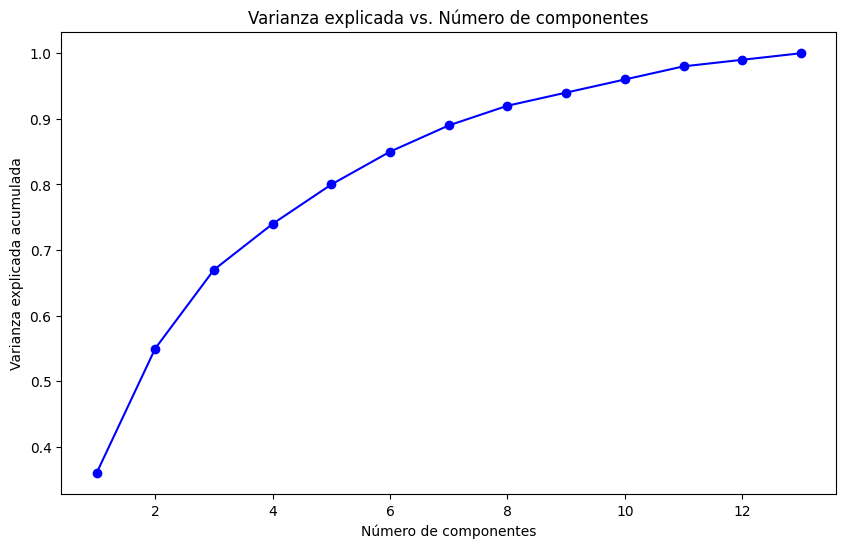

In [ ]:
# Graficar la varianza explicada
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_cumulative) + 1), explained_variance_cumulative, 'bo-')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada vs. Número de componentes')
plt.show()

* Escogemos 2 componentes principales para hacer la gráfica de 2D

In [ ]:
pca_2 = PCA(n_components = 2)

X_pca_2 = pca_2.fit_transform(X_scaled)


[0.36198848 0.1920749  0.11123631 0.0706903  0.06563294 0.04935823
 0.04238679 0.02680749 0.02222153 0.01930019 0.01736836 0.01298233
 0.00795215]


* Proyectar los datos en 2D

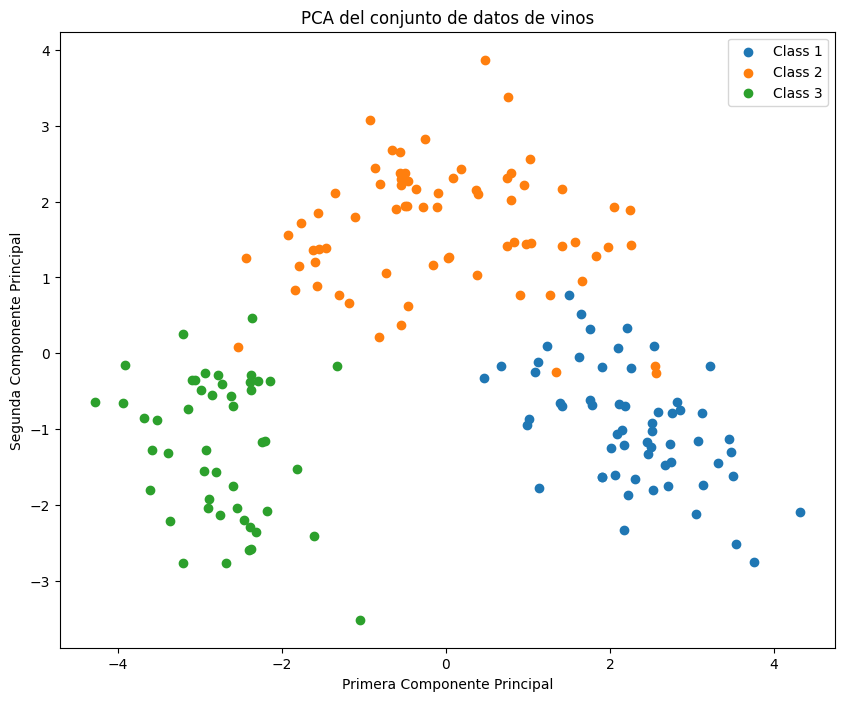

In [ ]:
plt.figure(figsize=(10, 8))
for i in range(1, 4):
    plt.scatter(X_pca_2[y == i, 0], X_pca_2[y == i, 1], label=f'Class {i}')
plt.xlabel('Primera Componente Principal')
plt.ylabel('Segunda Componente Principal')
plt.legend()
plt.title('PCA del conjunto de datos de vinos')
plt.show()